# Regression using a fully-connected neural network

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import jax
import jax.numpy as jnp
from jax import grad, jit, random

from jax.tree_util import tree_map
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

We are defining a function for initialising parameters of the neural network. Weights are random normal initialised and biases are set as ones.No. of units in each layer is set as 
First layer-No. of features
Second layer-10 units
Third layer-15 units
Final layer-1 unit

In [2]:
def initialize_params(layer_sizes):
  params = []
  for n_in, n_out in zip(layer_sizes[:-1], layer_sizes[1:]):
    params.append(dict(
        weights = random.normal(key = random.PRNGKey(111), shape = (n_in, n_out)) * jnp.sqrt(2/n_in),
        biases = jnp.ones(shape = (n_out, ))
      )
    )
  return params

params = initialize_params([1, 64, 128, 1])

params

[{'biases': DeviceArray([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
               1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
               1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
               1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
               1., 1., 1., 1.], dtype=float32),
  'weights': DeviceArray([[-1.53604090e+00, -1.89735606e-01, -1.18447506e+00,
                -1.13840115e+00, -9.05207813e-01, -2.37497211e-01,
                 1.43144894e+00, -1.09022760e+00,  2.68712950e+00,
                -7.24671125e-01, -9.04856741e-01,  3.01313221e-01,
                -7.41258502e-01,  7.90248871e-01, -1.32069731e+00,
                -2.07883167e+00, -6.76190257e-01, -1.71853149e+00,
                -1.91885745e-03,  4.19938326e-01, -1.19879842e+00,
                -4.50422168e-01,  1.76409185e+00,  1.69879094e-01,
                 9.93085265e-01,  2.96389103e-01, -2.94202828e+00,
                -1.57609522e

The shapes of our parameters(layer-wise) are checked using tree_map

In [3]:
jax.tree_map(lambda x: x.shape, params)

[{'biases': (64,), 'weights': (1, 64)},
 {'biases': (128,), 'weights': (64, 128)},
 {'biases': (1,), 'weights': (128, 1)}]

Prediction and loss functions are defined. Loss function is mean squared error.For hidden layers, RELU activation is applied. 

In [75]:
def predict_y(params, X):

    *hidden, last = params

    for layer in hidden:
      X = jax.nn.relu(jnp.matmul(X, layer['weights']) + layer['biases'])
    
    result = (jnp.matmul(X, last['weights']) + last['biases'])

    return (jnp.matmul(X, last['weights']) + last['biases'])

In [76]:
def loss_fn(params, X, y):

    p = predict_y(params, X)
    error = (predict_y(params, X) - y) ** 2

    return jnp.mean(error)

Function for updating parameters (using tree_map) are defined.

In [77]:
def update(params, X, y, lr):

  grads = jax.grad(loss_fn)(params, X, y)

  return jax.tree_map(
      lambda p, g: p - lr * g, params, grads
  )

# TODO Recording:

- Start with the first function for y in the cell below
- Execute all the code till the end
- Scroll back up to this cell, and change the y function to the second polynomial function
- Execute the code till the end
- Repeat for the 3rd sin function

In [78]:
# y = 5 * x + 9 + np.random.normal(size=(256, 1), scale = 1.5)

# y = 5 * x**2 + 9 * x + 1 + np.random.normal(size=(256, 1), scale = 1.5)

# y = jnp.sin(x) + np.random.normal(size=(256, 1), scale = 1.5)

In [79]:
x = np.random.normal(size=(256, 1))

y = 5 * x + 9 + np.random.normal(size=(256, 1), scale = 1.5)

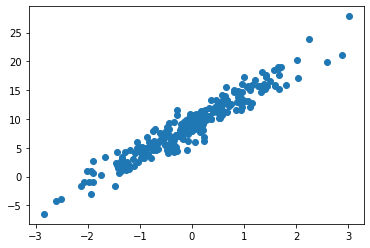

In [80]:
plt.scatter(x, y)

In [81]:
params = initialize_params([1, 64, 128, 1])

In [82]:
loss_history = []

for i in range(5000):

    loss = loss_fn(params, x, y)

    if (i + 1) % 500 == 0:
      print('Iteration', i + 1, 'Loss:', loss)
    
    loss_history.append(loss)

    params = jit(update)(params, x, y, lr = 0.0001)

Iteration 500 Loss: 2.4881797
Iteration 1000 Loss: 2.3228922
Iteration 1500 Loss: 2.2254996
Iteration 2000 Loss: 2.162554
Iteration 2500 Loss: 2.1262984
Iteration 3000 Loss: 2.102062
Iteration 3500 Loss: 2.0841043
Iteration 4000 Loss: 2.068963
Iteration 4500 Loss: 2.0560985
Iteration 5000 Loss: 2.045859


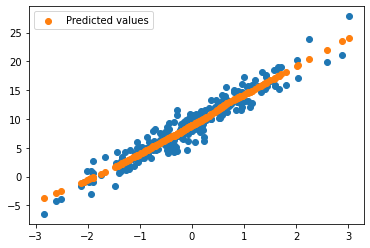

In [83]:
plt.scatter(x, y)
plt.scatter(x, predict_y(params, x), label='Predicted values')
plt.legend()